"Text emotions classification is the problem of natural language processing and text classification. Here we need to train a text classification model to classify the emotion of a text."

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [14]:
# Load dataset
data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]
print(data.head())

                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness


In [15]:
# Prepare text and labels
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Convert text to sequences and pad them
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [16]:
# Encode the string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [19]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
one_hot_labels = to_categorical(labels)

In [20]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, 
                                                one_hot_labels, 
                                                test_size=0.2)

In [21]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

C:\Users\visha\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.4886 - loss: 1.3364 - val_accuracy: 0.7188 - val_loss: 0.8316
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8964 - loss: 0.3334 - val_accuracy: 0.8106 - val_loss: 0.5763
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9857 - loss: 0.0569 - val_accuracy: 0.8213 - val_loss: 0.5952
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9956 - loss: 0.0223 - val_accuracy: 0.8303 - val_loss: 0.6386
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9975 - loss: 0.0148 - val_accuracy: 0.8153 - val_loss: 0.6835
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9974 - loss: 0.0133 - val_accuracy: 0.8228 - val_loss: 0.6912
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9979 - loss: 0.0102 - val_accuracy: 0.8259 - val_loss: 0.7026
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9980 - loss: 0.0096 - 

C:\Users\visha\AppData\Local\Temp\ipykernel_7684\866800368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Emotions"], order=data["Emotions"].value_counts().index, palette="plasma")


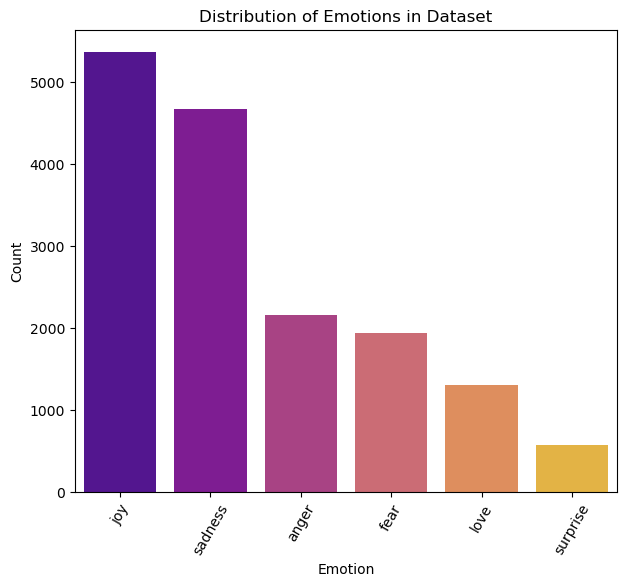

In [25]:
plt.figure(figsize=(7,6))
sns.countplot(x=data["Emotions"], order=data["Emotions"].value_counts().index, palette="plasma")
plt.title("Distribution of Emotions in Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

In [26]:
# Emotion to Emoji mapping
emotion_to_emoji = {
    "sadness": "😢",
    "anger": "😡",
    "love": "❤️",
    "joy": "😊",
    "fear": "😨",
    "surprise": "😲"
}

# Test with new input
input_text = "He can't focus on his work because he found out he's going to be a father."

# Preprocess the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
# Predict emotion
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])[0]  # <-- take [0]

# Add emoji
emoji_output = emotion_to_emoji.get(predicted_label, "🙂")  # default emoji if not found
print(f"Predicted Emotion: {predicted_label} {emoji_output}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted Emotion: fear 😨
